In [1]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pandas.read_csv("https://raw.githubusercontent.com/paulwababu/datasets/main/drug200.csv")
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [3]:
#Change string values into numerical values:
d = {'M': 1, 'F': 0}
df['Sex'] = df['Sex'].map(d)

d = {'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
df['BP'] = df['BP'].map(d)

d = {'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
df['Cholesterol'] = df['Cholesterol'].map(d)
print(df.head())

   Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   0            0   25.355  drugY
1   47    1   1            0   13.093  drugC
2   47    1   1            0   10.114  drugC
3   28    0   2            0    7.798  drugX
4   61    0   1            0   18.043  drugY


In [4]:
#independent variables
features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = df[features]

#dependent variable
y = df['Drug']

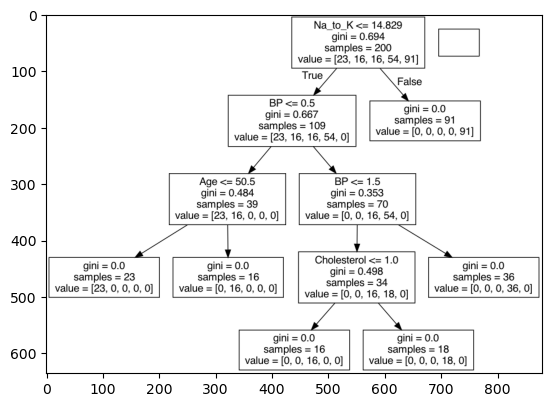

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [5]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')

img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()
print(df['Drug'].value_counts())

Predict Values

In [6]:
y_pred = dtree.predict([[68, 0,2,2,27.10],[6, 0,1,0,2.10]])
print(y_pred)
# ['drugY'] will be the output

['drugY' 'drugC']


/Users/wesley/miniforge3/envs/vercel/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [7]:
# Save the model
joblib_file = "DecisionTreeModel.joblib"
joblib.dump(dtree, joblib_file) 

['DecisionTreeModel.joblib']

In [8]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
# tree.plot_tree(dtree)


%2B8P7/IrdbGSz8n5Ph/XxR%2BcEnldDeY8r/M%2BBodlWZYAAABgG07TAwAAANC8CEAAAACbIQABAABshgAEAACwGQIQAADAZghAAAAAmyEAAQAAbIYABAAAsBkCEAAAwGYIQAAAAJshAAEAAGyGAAQAALAZAhAAAMBmCEAAAACbIQABAABshgAEAACwGQIQAADAZghAAAAAmyEAAQAAbIYABAAAsBkCEAAAwGYIQAAAAJshAAEAAGyGAAQAALAZAhAAAMBmCEAAAACbIQABAABshgAEAACwGQIQAADAZghAAAAAmyEAAQAAbIYABAAAsBkCEAAAwGYIQAAAAJshAAEAAGyGAAQAALAZAhAAAMBmCEAAAACbIQABAABshgAEAACwGQIQAADAZghAAAAAmyEAAQAAbIYABAAAsBkCEAAAwGYIQAAAAJshAAEAAGyGAAQAALAZAhAAAMBmCEAAAACbIQABAABshgAEAACwGQIQAADAZghAAAAAmyEAAQAAbIYABAAAsJkg0wNaMp/Pp3379ik6OloOh8P0HAAAcAosy1J1dbU6dOggp9Oer4URgGdh3759SkpKMj0DAACcgbKyMnXq1Mn0DCMIwLMQHR0t6Zs/QDExMYbXAACAU1FVVaWkpKQTz%2BN2RACehX%2BefWNiYghAAABaGDu/fcueh28AAAAbIwABAABshgAEAACwGQIQAADAZghAAAAAmyEAAQAAbIYABAAAsBkCEAAAwGYIQAAAAJshAAEAAGyGAAQAALAZAhAAAPgly7JMTwhYBCAAAPA7RbuPatTsT7Wzotb0lIBEAAIAAL9hWZaeW75DY//0uTYfqNZjb282PSkgBZkeAAAAIElHaxt055ISfbC5XJJ05cB2euyGQYZXBSYCEAAAGPfVziPKKSjSvsp6hQQ5df/V/XXzBZ3lcDhMTwtIBCAAADDG57P0p%2BXb9fR7pfL6LHVrE6m8zDQN6BBrelpAIwABAIARh

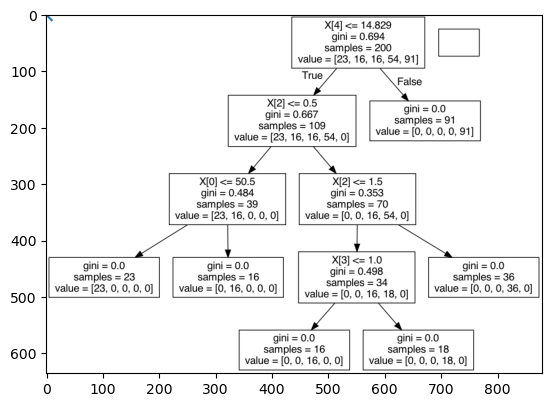

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [9]:
import io
import urllib, base64
plt.plot(range(10))
fig = plt.gcf()
#convert graph into dtring buffer and then we convert 64 bit code into image
buf = io.BytesIO()
fig.savefig(buf,format='png')
buf.seek(0)
string = base64.b64encode(buf.read())
uri =  urllib.parse.quote(string)
print("data:image/png;base64,"+uri)
# fig.savefig("fig.png",format='png')
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')

img=pltimg.imread('mydecisiontree2.jpg')
imgplot = plt.imshow(img)
plt.show()
print(df['Drug'].value_counts())


### try svm

In [59]:
# train sigmoid 100
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

clf = SVC(kernel='sigmoid', gamma=1, C=1.0)
clf.fit(X, y)
print(clf)
y_pred = clf.predict([[18, 10,2,2,70.10],[6, 0,3,0,0],[68, 0,2,2,2]])
print(y_pred)
y_pred = dtree.predict([[68, 0,2,2,27.10],[6, 0,1,0,2.10],[68, 0,2,2,2]])
print(y_pred)
# Save the model
joblib_file = "SVM.joblib"
joblib.dump(clf, joblib_file) 

SVC(gamma=1, kernel='sigmoid')
['drugY' 'drugY' 'drugY']
['drugY' 'drugC' 'drugX']


/Users/wesley/miniforge3/envs/vercel/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/wesley/miniforge3/envs/vercel/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


['SVM.joblib']